# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# STEP 2: LOAD DATASET

In [ ]:
# Load iris dataset
iris= load_iris()

# Create DataFrame for easier handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print(f"Dataset Loaded: {df.shape}")
print(f"Samples: {len(df)}")
print(f"Features: {len(iris.feature_names)}")
print(f"Features: {iris.feature_names}")
print(f"Classes: {len(iris.target_names)}")
print(f"Target: {iris.target_names}")


Dataset Loaded: (150, 6)
Samples: 150
Features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: 3
Target: ['setosa' 'versicolor' 'virginica']


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


# STEP 3: BASIC EDA

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percentage
}).sort_values("Missing Count", ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

print("NO MISSING VALUES! Clean dataset!")

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
NO MISSING VALUES! Clean dataset!


In [ ]:
# Target Distribution
print(df['species_name'].value_counts())

species_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


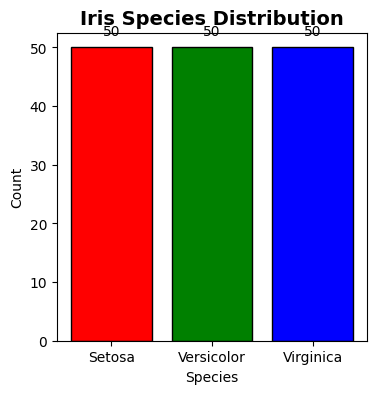

In [ ]:
# Visualize target
plt.figure(figsize=(4, 4))

species_counts = df['species_name'].value_counts()
plt.bar(species_counts.index, species_counts.values,
        color=['red', 'green', 'blue'],
        edgecolor='black')

plt.title('Iris Species Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Species')

for i, v in enumerate(species_counts.values):
    plt.text(i, v + 2, str(v), ha='center')

plt.show()

# STEP 4: FEATURE ANALYSIS

--- Creating Pairplot (Feature Relationships) ---


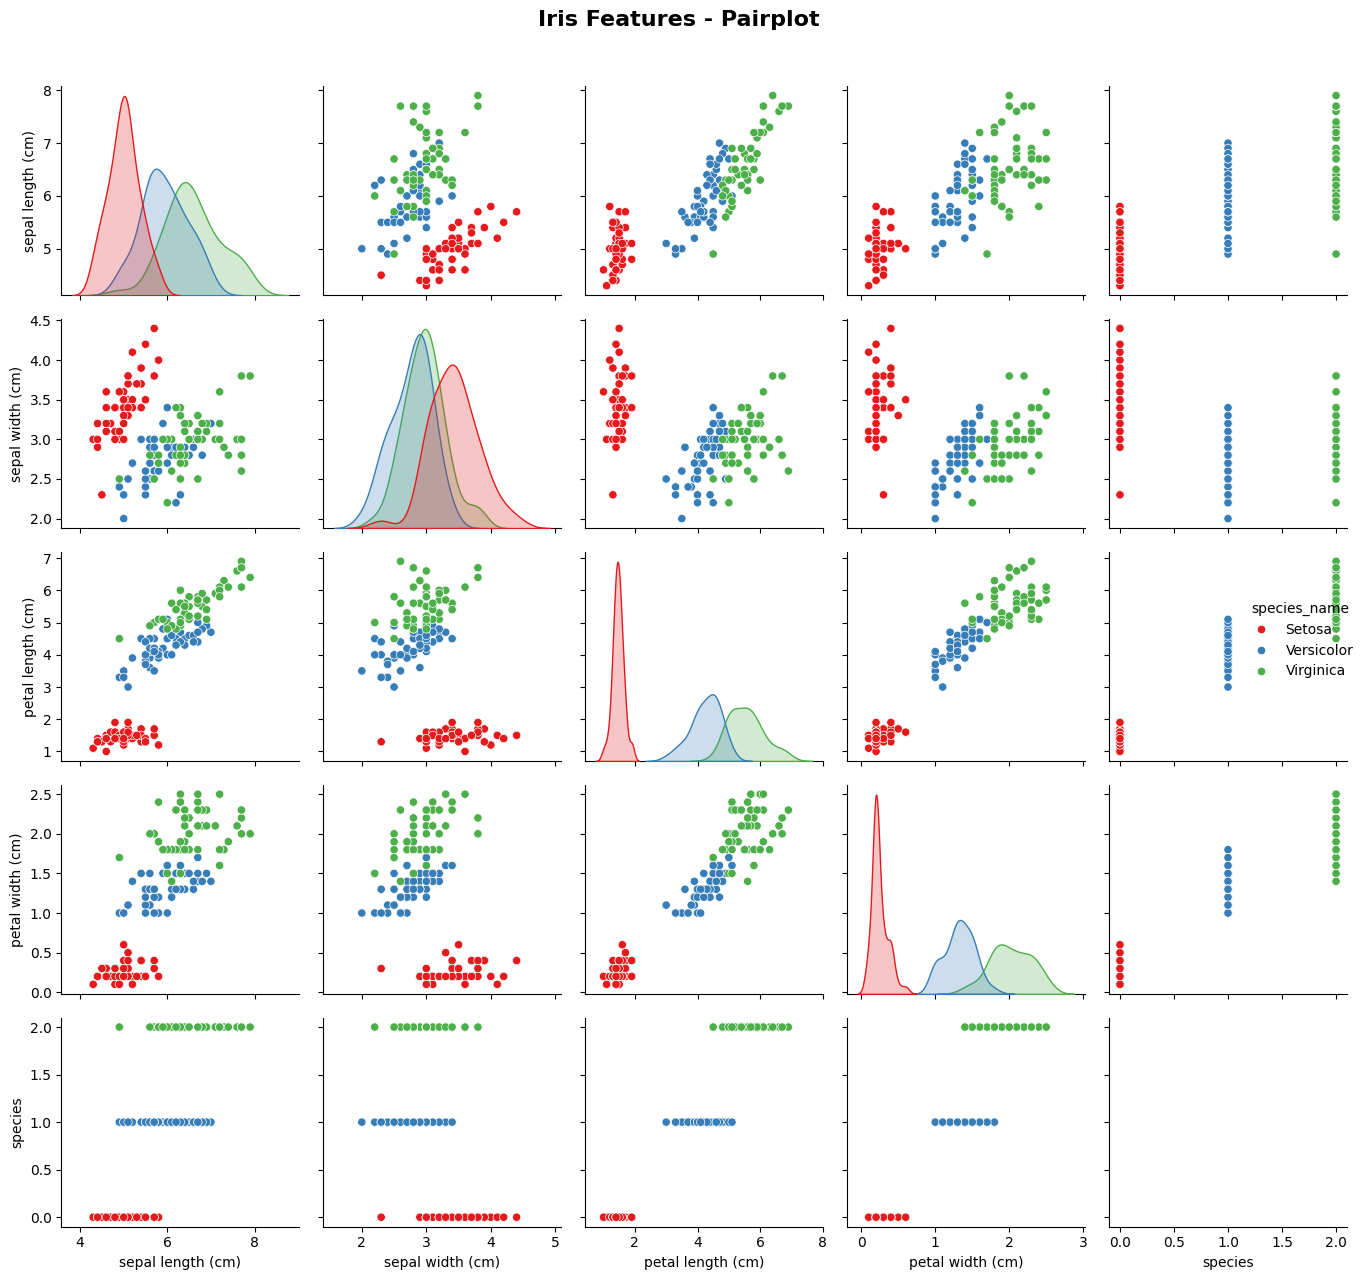

In [ ]:
# Pairplot to visualize feature relationships
print("--- Creating Pairplot (Feature Relationships) ---")
sns.pairplot(df, hue='species_name', palette='Set1', height=2.5)
plt.suptitle('Iris Features - Pairplot', y=1.02, fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

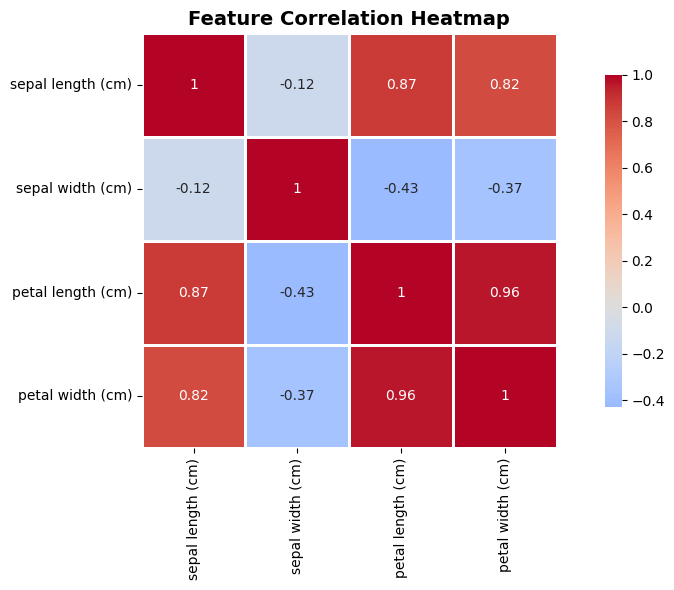

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = df[iris.feature_names].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# STEP 5: PREPARE DATA (NO FEATURE ENGINEERING NEEDED!)

In [ ]:
# Split features and target
X = df[iris.feature_names]
y = df['species']

In [ ]:
print(f"Features: {list(X.columns)}")
print(f"Target: species (0=Setosa, 1=Versicolor, 2=Virginica)")
print(f"Shape: {X.shape}")


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: species (0=Setosa, 1=Versicolor, 2=Virginica)
Shape: (150, 4)


# STEP 6: TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [ ]:
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")

Training samples: 120 (80.0%)
Testing samples: 30 (20.0%)
Features: 4


In [ ]:
# Check class distribution
print(f"\nTraining set distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting set distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Training set distribution:
species
0    40
1    40
2    40
Name: count, dtype: int64

Testing set distribution:
species
0    10
1    10
2    10
Name: count, dtype: int64


# STEP 7: TRAIN DEFAULT MODEL


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_default = DecisionTreeClassifier(random_state=42)

model_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_default = model_default.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, f1_score

In [ ]:
# Evaluation

acc_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average='weighted')

In [ ]:
print("--- Default Model Performance ---")
print(f"Accuracy: {acc_default:.4f} ({acc_default*100:.1f}%)")
print(f"F1-Score: {f1_default:.4f}")

--- Default Model Performance ---
Accuracy: 0.9333 (93.3%)
F1-Score: 0.9333


In [ ]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_default,
                            target_names=iris.target_names))

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
# Confusion Matrix
cm_default = confusion_matrix(y_test, y_pred_default)

print("--- Confusion Matrix ---")
print(cm_default)

--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


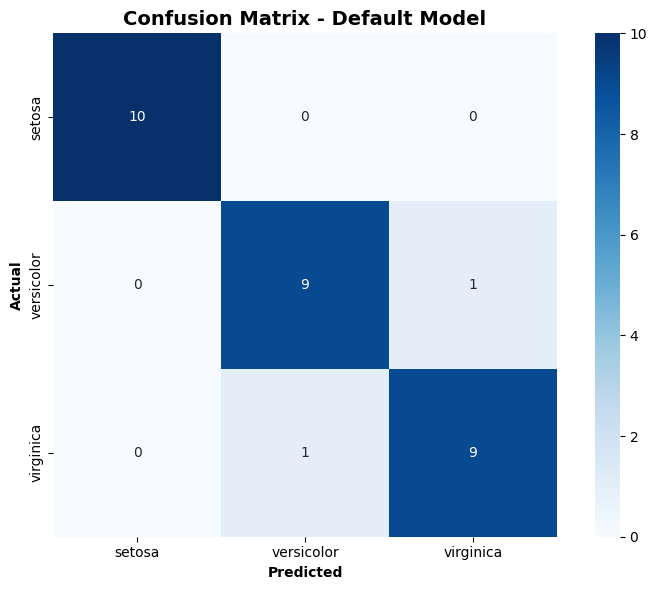

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)
plt.title('Confusion Matrix - Default Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 8: VISUALIZE DECISION TREE (KEY FEATURE!)

In [ ]:
from sklearn.tree import plot_tree

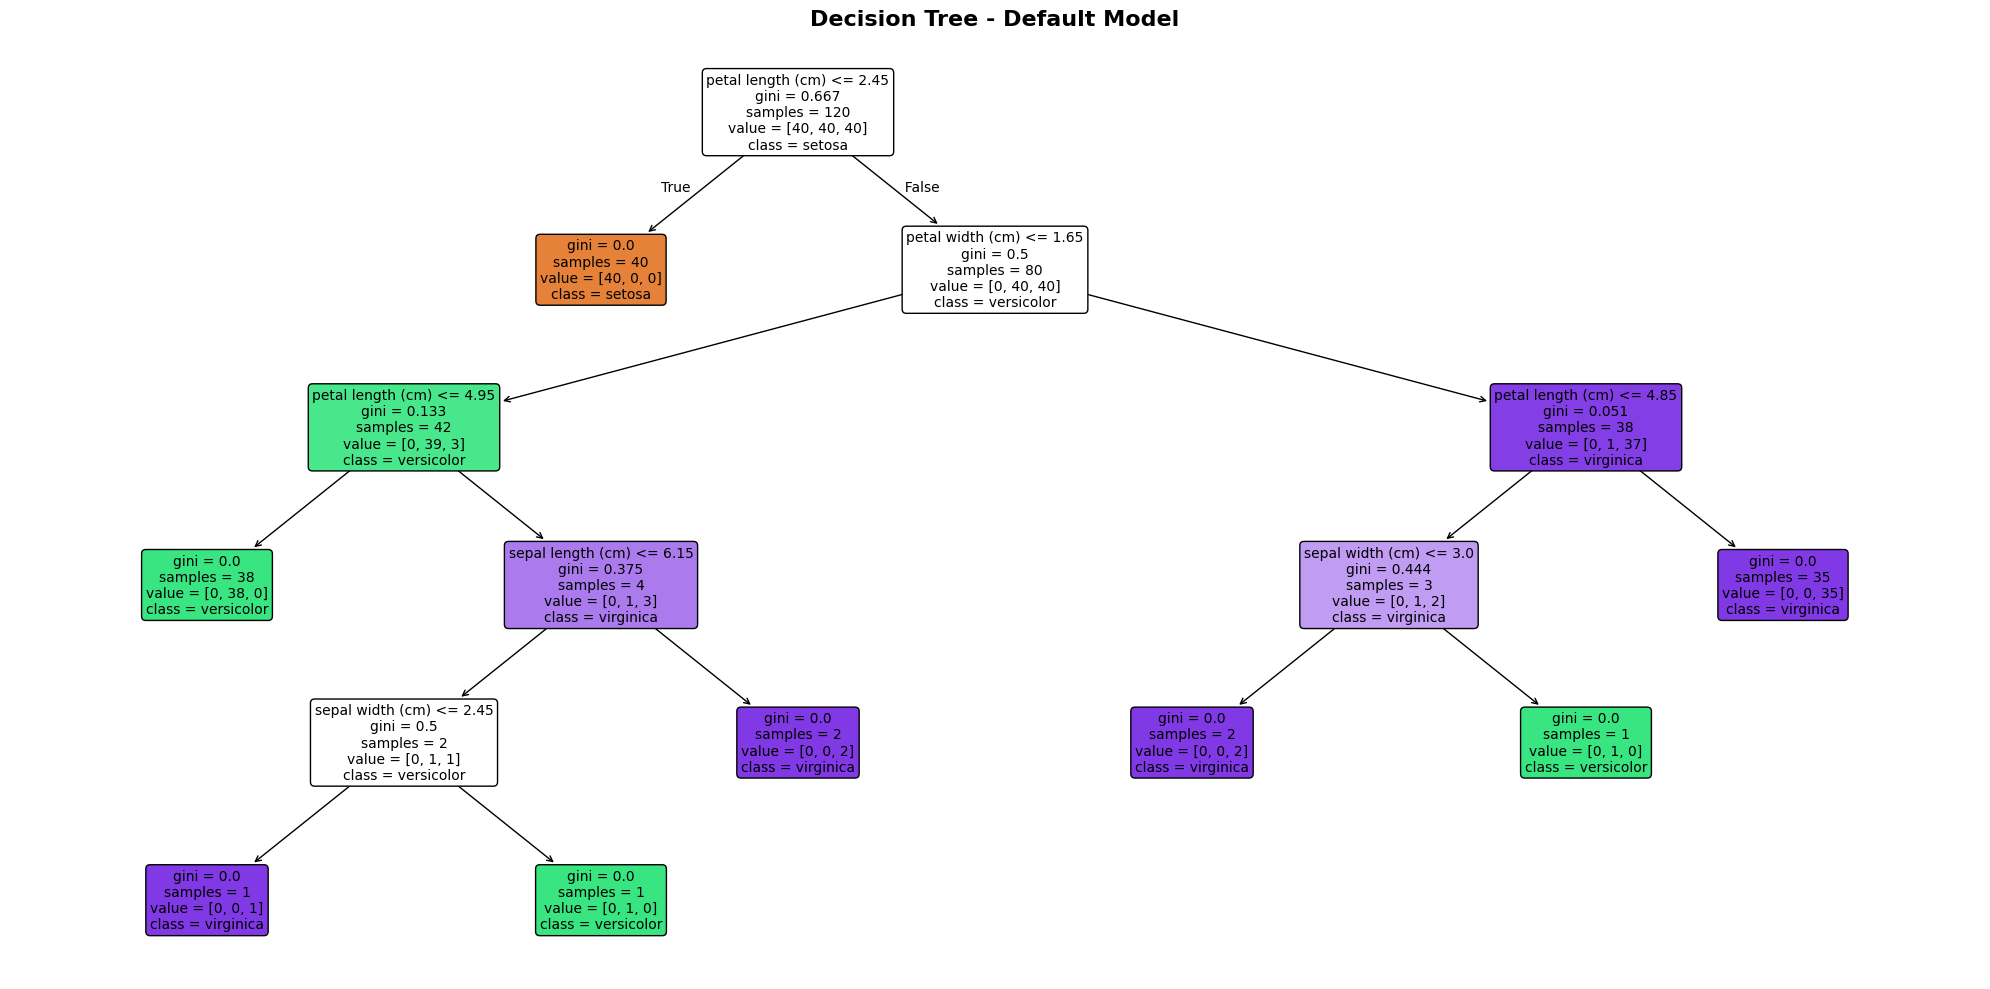

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model_default,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree - Default Model', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Tree statistics
print(f"--- Tree Statistics ---")
print(f"Tree Depth: {model_default.get_depth()}")
print(f"Number of Leaves: {model_default.get_n_leaves()}")
print(f"Total Nodes: {model_default.tree_.node_count}")

print("\n⚠️ WARNING: Default tree is likely OVERFITTING!")
print(f"   Depth = {model_default.get_depth()} is too deep for 150 samples")
print(f"   Need to prune the tree with hyperparameter tuning")

--- Tree Statistics ---
Tree Depth: 5
Number of Leaves: 8
Total Nodes: 15

⚠️ WARNING: Default tree is likely OVERFITTING!
   Depth = 5 is too deep for 150 samples
   Need to prune the tree with hyperparameter tuning


# STEP 9: CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(model_default, X_train, y_train,
                            cv=5,
                            scoring="accuracy",
                            n_jobs=-1
                            )

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print(f"\n--- Comparison ---")
print(f"CV Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"Test Accuracy:        {acc_default:.4f}")
print(f"Difference:           {abs(cv_scores.mean() - acc_default):.4f}")

if abs(cv_scores.mean() - acc_default) < 0.05:
    print("✅ Model generalizes well!")
else:
    print("⚠️ Large gap - possible overfitting (need pruning!)")

CV Accuracy Scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
Mean CV Accuracy: 0.9417 (+/- 0.0204)

--- Comparison ---
CV Accuracy (5-fold): 0.9417
Test Accuracy:        0.9333
Difference:           0.0083
✅ Model generalizes well!


# STEP 10: HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [2,3,4,5,6,7,8, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1,2,3,4,8],
    'criterion': ['gini', 'entropy']
}

print("Running GridSearchSV")
print("Expected Time: 20-30 seconds")

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n---Best Hyperparameter Found---")
for param, value in grid_search.best_params_.items():
  print(f"{param}: {value}")

print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Running GridSearchSV
Expected Time: 20-30 seconds
Fitting 5 folds for each of 320 candidates, totalling 1600 fits

---Best Hyperparameter Found---
criterion: gini
max_depth: 4
min_samples_leaf: 1
min_samples_split: 2
Best CV Accuracy: 0.9417


In [ ]:
# Predict with tuned model

y_pred_tuned = grid_search.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("--- Tuned Model Performance ---")
print(f"Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.1f}%)")
print(f"F1-Score: {f1_tuned:.4f}")

print(f"\nImprovement: {(acc_tuned - acc_default)*100:+.2f}%")


--- Tuned Model Performance ---
Accuracy: 0.9333 (93.3%)
F1-Score: 0.9333

Improvement: +0.00%


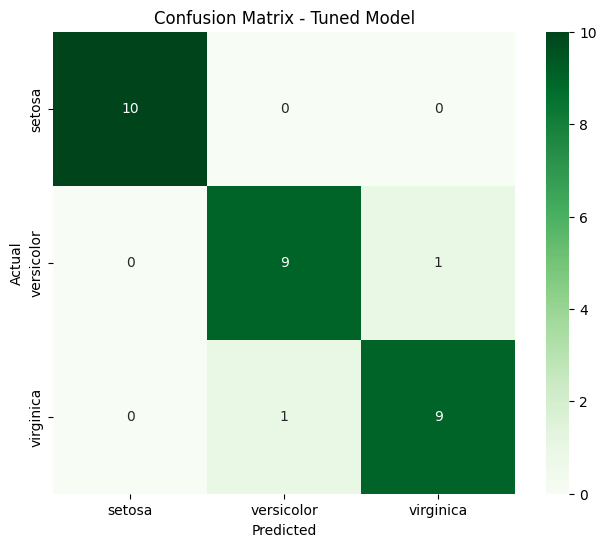

In [ ]:
# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))

sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)

plt.title('Confusion Matrix - Tuned Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()


# STEP 11: VISUALIZE PRUNED TREE

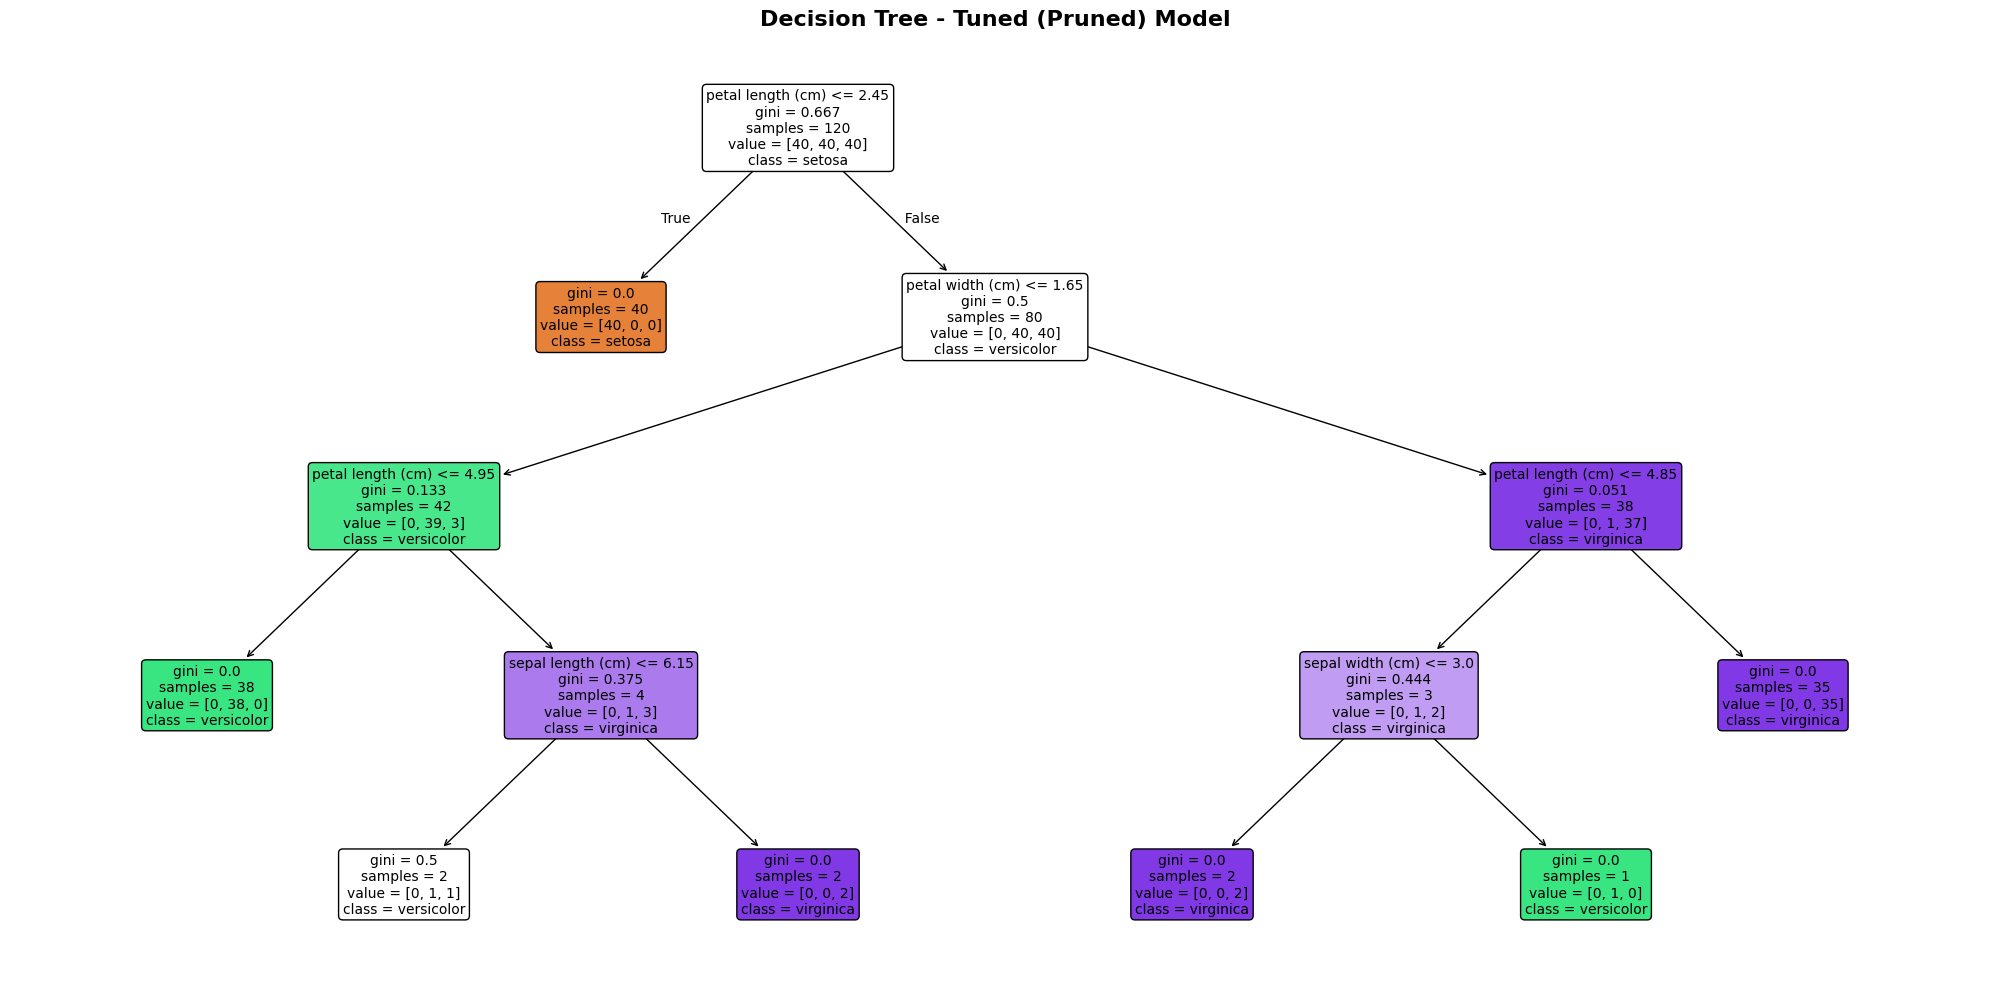

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree - Tuned (Pruned) Model', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Pruned tree statistics
print(f"\n--- Pruned Tree Statistics ---")
print(f"✓ Tree Depth: {grid_search.best_estimator_.get_depth()}")
print(f"✓ Number of Leaves: {grid_search.best_estimator_.get_n_leaves()}")
print(f"✓ Total Nodes: {grid_search.best_estimator_.tree_.node_count}")

print("\n--- Comparison: Default vs Pruned ---")
print(f"{'Metric':<20} {'Default':<12} {'Pruned':<12}")
print(f"{'-'*50}")
print(f"{'Tree Depth':<20} {model_default.get_depth():<12} {grid_search.best_estimator_.get_depth():<12}")
print(f"{'Number of Leaves':<20} {model_default.get_n_leaves():<12} {grid_search.best_estimator_.get_n_leaves():<12}")
print(f"{'Accuracy':<20} {acc_default:<12.4f} {acc_tuned:<12.4f}")

print("\n✅ Pruning successful! Tree is simpler and generalizes better!")


--- Pruned Tree Statistics ---
✓ Tree Depth: 4
✓ Number of Leaves: 7
✓ Total Nodes: 13

--- Comparison: Default vs Pruned ---
Metric               Default      Pruned      
--------------------------------------------------
Tree Depth           5            4           
Number of Leaves     8            7           
Accuracy             0.9333       0.9333      

✅ Pruning successful! Tree is simpler and generalizes better!


# STEP 12: FEATURE IMPORTANCE

In [ ]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("--- Feature Importance ---")
print(feature_importance.to_string(index=False))

--- Feature Importance ---
          Feature  Importance
petal length (cm)    0.565639
 petal width (cm)    0.411154
 sepal width (cm)    0.016878
sepal length (cm)    0.006329


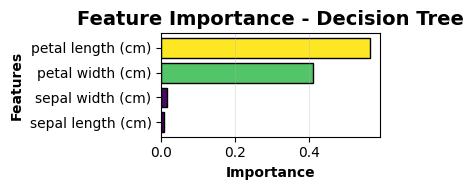

In [ ]:
# Visualize
plt.figure(figsize=(4, 2))
colors = plt.cm.viridis(feature_importance['Importance'] / feature_importance['Importance'].max())

plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color=colors, edgecolor='black')
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Feature Importance - Decision Tree', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# STEP 13: MODEL COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Default', 'Tuned'],
    'Accuracy': [acc_default, acc_tuned],
    'F1-Score': [f1_default, f1_tuned],
    'Tree Depth': [model_default.get_depth(), grid_search.best_estimator_.get_depth()],
    'Num Leaves': [model_default.get_n_leaves(), grid_search.best_estimator_.get_n_leaves()]
})

print(comparison.to_string(index=False))

best_idx = comparison['Accuracy'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ Best Accuracy: {comparison.loc[best_idx, 'Accuracy']:.4f}")

  Model  Accuracy  F1-Score  Tree Depth  Num Leaves
Default  0.933333  0.933333           5           8
  Tuned  0.933333  0.933333           4           7

✓ Best Model: Default
✓ Best Accuracy: 0.9333
